In [1]:
import plots
import statistics
import importlib
importlib.reload(plots)


from marketenvironment import MarketEnvironment
from simulation import run_episode

TEST = True

# RL-Environment

In [2]:
if TEST:
    costs = [2, 3, 5, 7, 8]
    sim_env = MarketEnvironment(num_agents=len(costs), costs=costs, sigma=0)
    steps = 8000
    print(f"Running simulation for {steps} steps...")
    sim_env, round_info, q_snapshots, snap_steps = run_episode(sim_env=sim_env, max_steps=steps)

Running simulation for 8000 steps...


In [3]:
if TEST:
    import json
    import numpy as np

    def json_serial(obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        raise TypeError(f"Type {type(obj)} not serializable")

    with open("output/round_info_statik.json", "w") as f:
        json.dump(round_info, f, default=json_serial, indent=2)

    # write q_snapshots to json file
    with open("output/q_snapshots_statik.json", "w") as f:
        json.dump(q_snapshots, f, default=json_serial, indent=2)

    with open("output/snap_steps_statik.json", "w") as f:
        json.dump(snap_steps, f, default=json_serial, indent=2)
else:
    import json

    with open("output/round_info_statik.json", "r") as f:
        round_info = json.load(f)

    with open("output/q_snapshots_statik.json", "r") as f:
        q_snapshots = json.load(f)

    with open("output/snap_steps_statik.json", "r") as f:
        snap_steps = json.load(f)

Mean und Standardabweichung der Rewards

In [30]:
inner_dict = round_info[0]
rz_keys = [key for key in inner_dict.keys() if key.startswith("RZ")]
steps = sorted(round_info.keys())

print(f"{'RZ':<6} {'Mean':>12} {'Stdabw.':>12} {'Std/Mean':>12}")
print("-" * 46)

for rz in rz_keys:
    rewards = [round_info[s][rz]["actual_reward"] for s in steps]
    mean = statistics.mean(rewards)
    stdev = statistics.stdev(rewards)
    print(f"{rz:<6} {mean:12.2f} {stdev:12.2f} {stdev/mean:12.4f}")

RZ             Mean      Stdabw.     Std/Mean
----------------------------------------------
RZ1            4.90         0.70       0.1427
RZ2            3.14         0.46       0.1476
RZ3            4.30         4.18       0.9734
RZ4            3.73         4.18       1.1198
RZ5            3.42         4.29       1.2553


Erklärung der Werte

Barplot: Ausgabe pro Agent auf dem Markt

Plot: Total paid on market per Agent


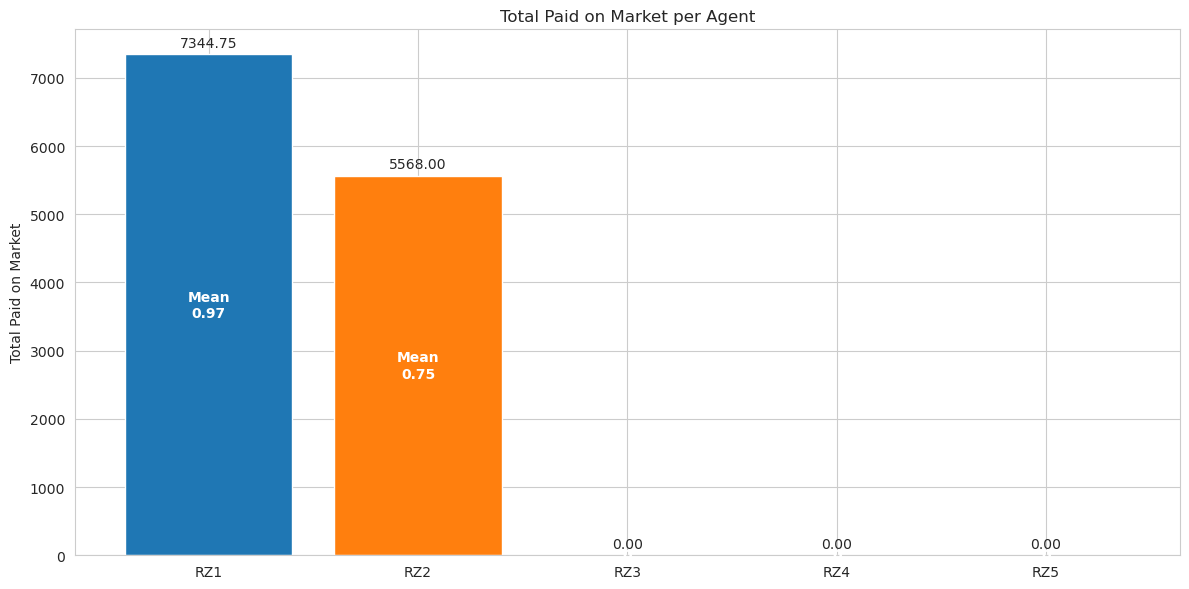

In [19]:
print("Plot: Total paid on market per Agent")
plots.plot_paid_on_market(round_info)

Barplot: Gewinn pro Agent über alle Runden

Plotting Cumulative Rewards


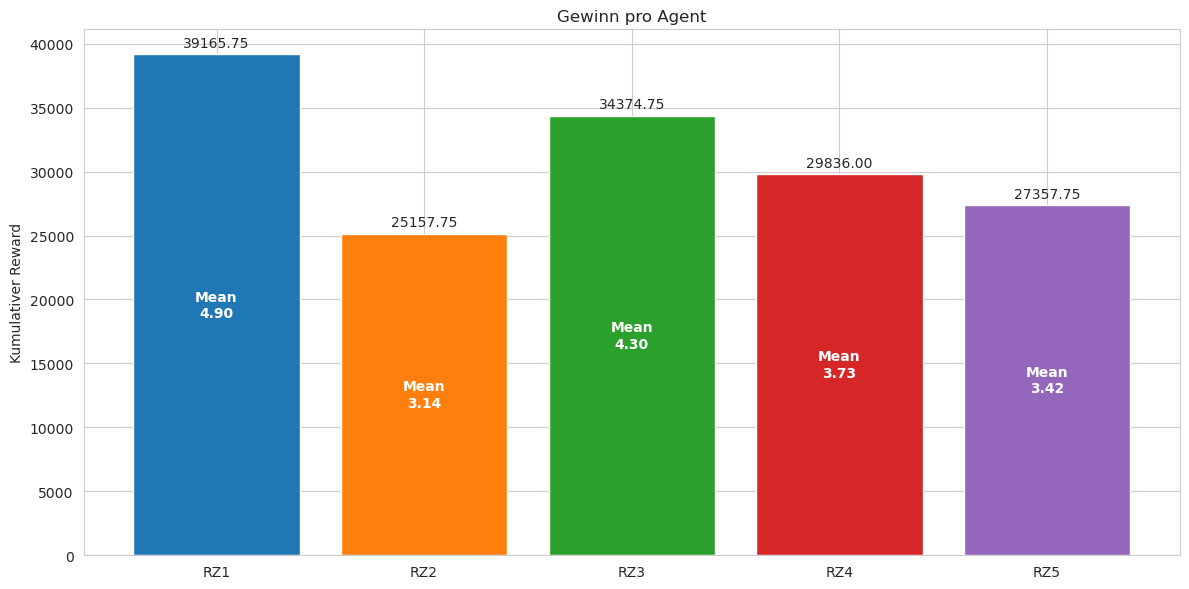

In [32]:
print("Plotting Cumulative Rewards")
plots.plot_cumulative_rewards(round_info)

Barplot: Anzahl bearbeiteter Aufträge pro Agent

In [37]:
importlib.reload(plots)

<module 'plots' from '/home/niklas/Dokumente/Master/VAS/FederatedComputeCluster/src/plots.py'>

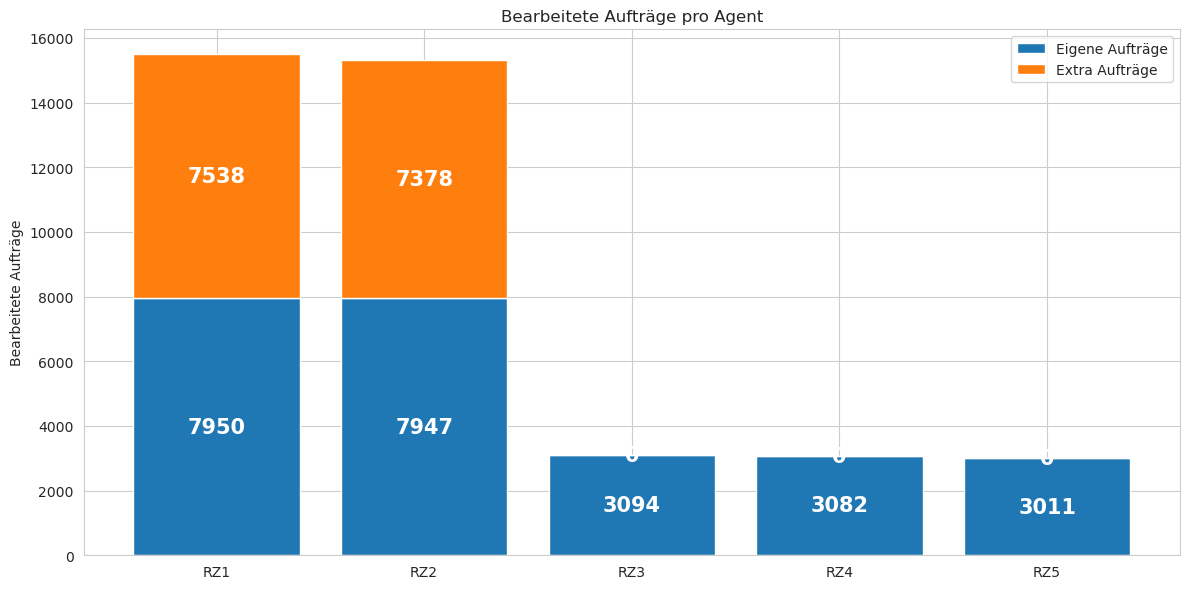

In [38]:
plots.plot_processed_jobs(round_info)

Barplot: Anzahl bearbeiteter fremder Aufträge pro Agent

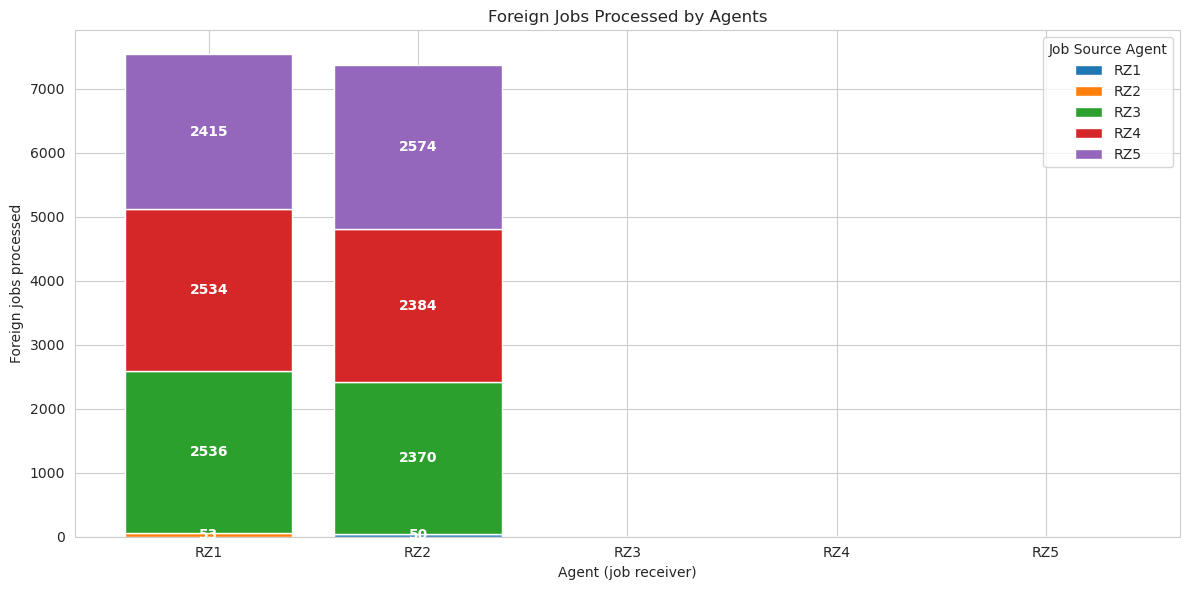

In [22]:
plots.plot_processed_foreign_jobs(round_info)

Barplot: Bearbeitung gegen inserierung pro Agent

In [41]:
importlib.reload(plots)

<module 'plots' from '/home/niklas/Dokumente/Master/VAS/FederatedComputeCluster/src/plots.py'>

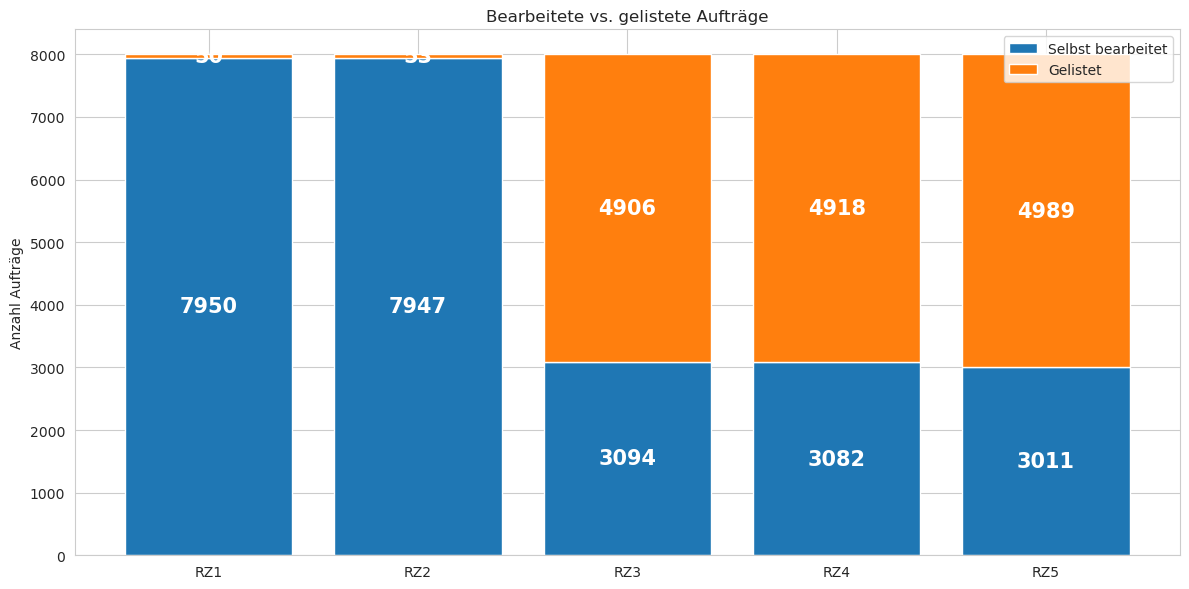

In [42]:
plots.plot_processed_vs_listed(round_info)

Lineplot: Preis über die Runden

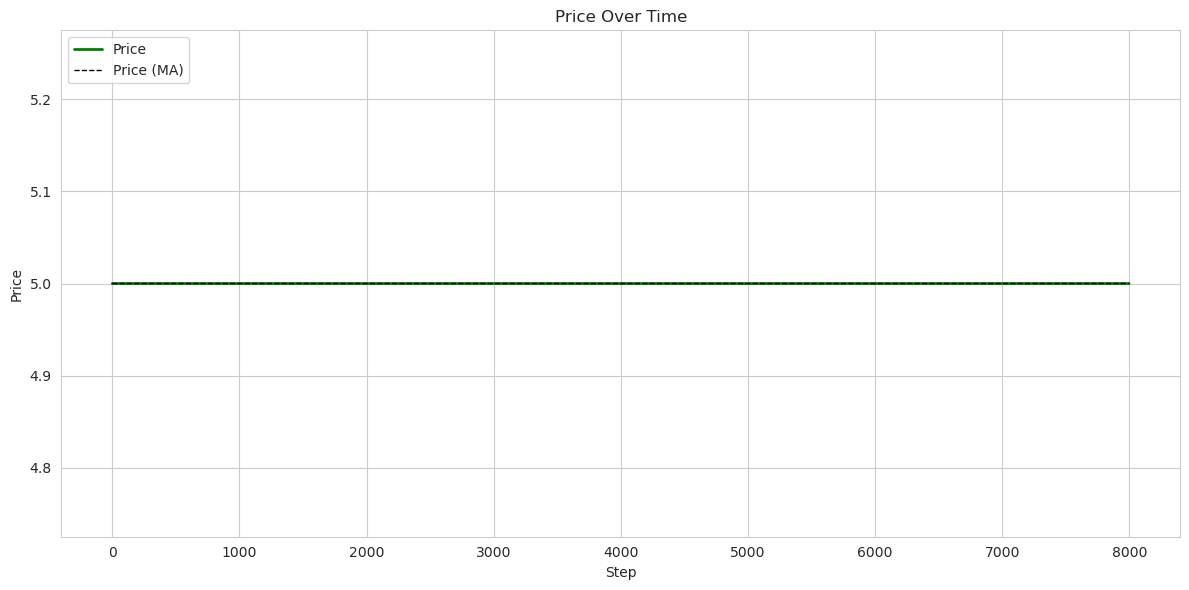

In [24]:
plots.plot_price(round_info)

Plotting Q-Tables
Agent RZ1


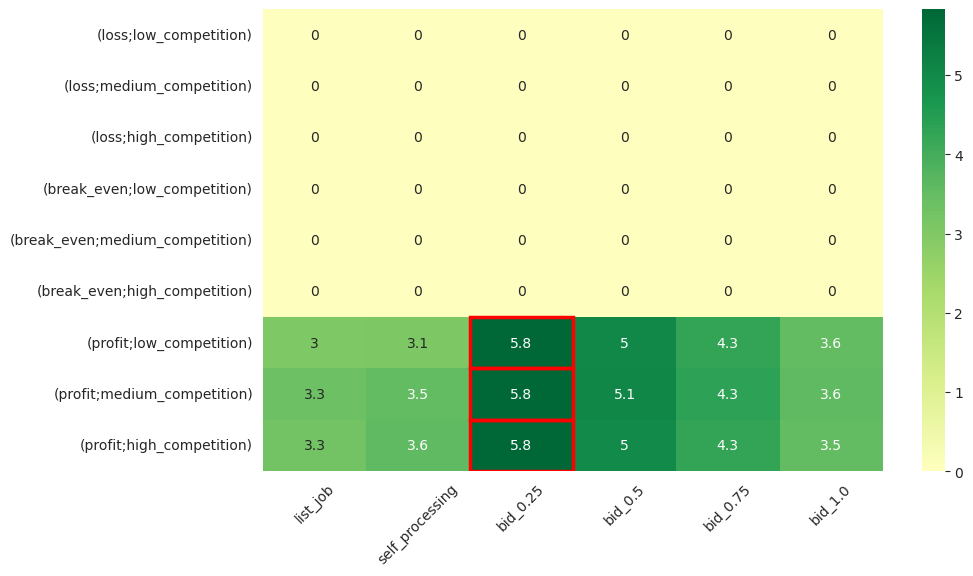

Agent RZ2


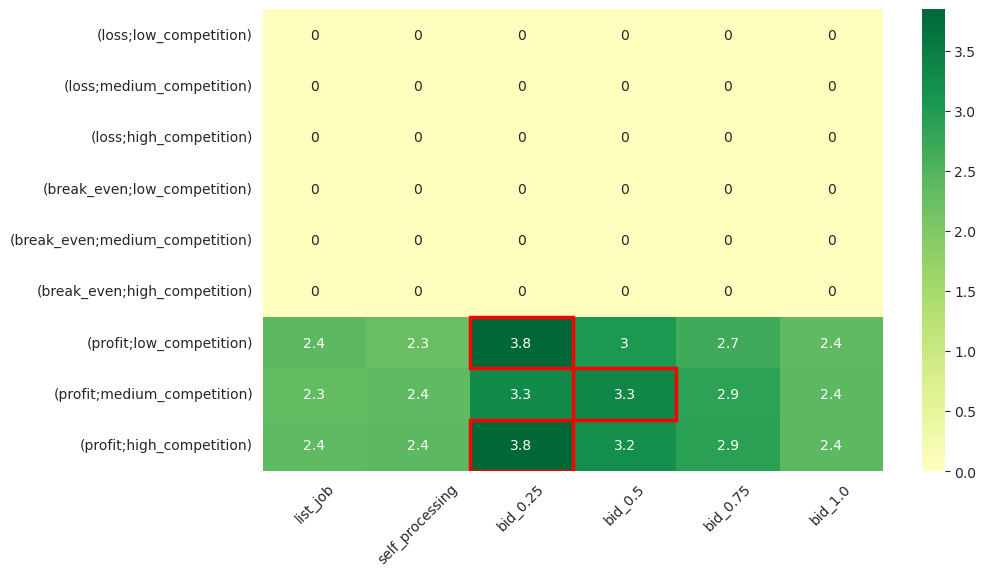

Agent RZ3


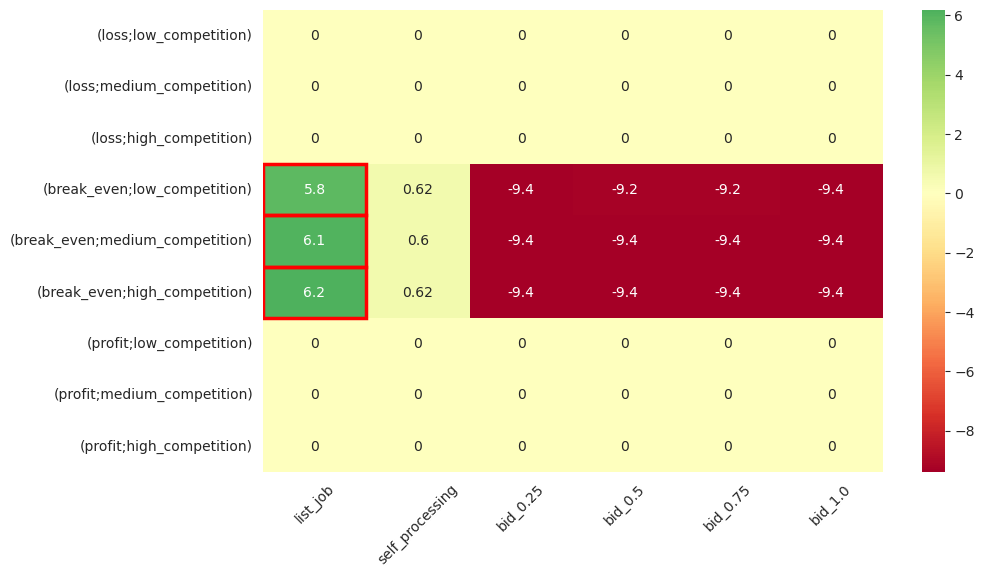

Agent RZ4


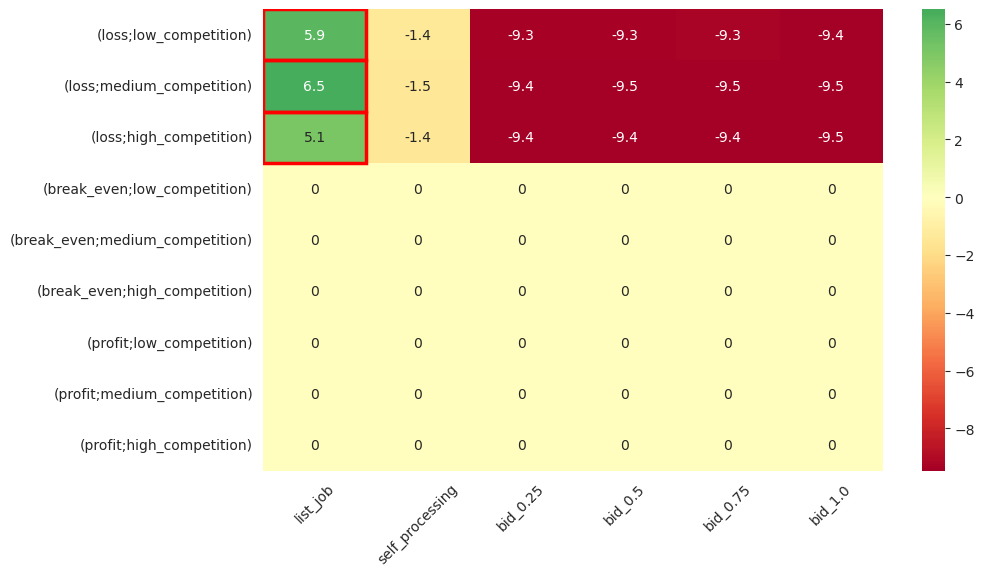

Agent RZ5


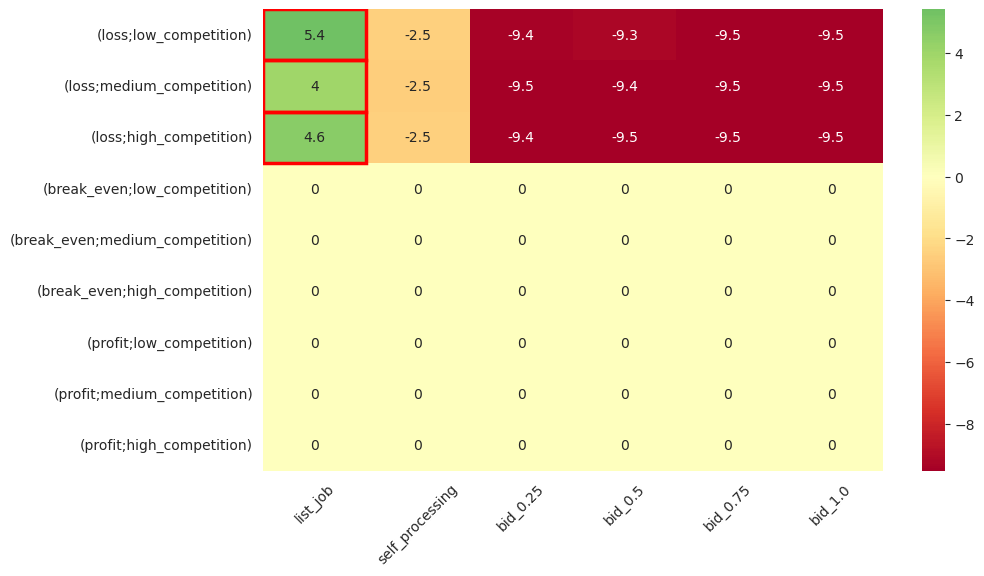

In [25]:
print("Plotting Q-Tables")
for agent in q_snapshots.keys():
    print(f"Agent {agent}")
    plots.plot_q_tables(q_snapshots[agent][-1])

Lineplot: Rewards pro Runde und Agent

Plotting Rewards
RZ1


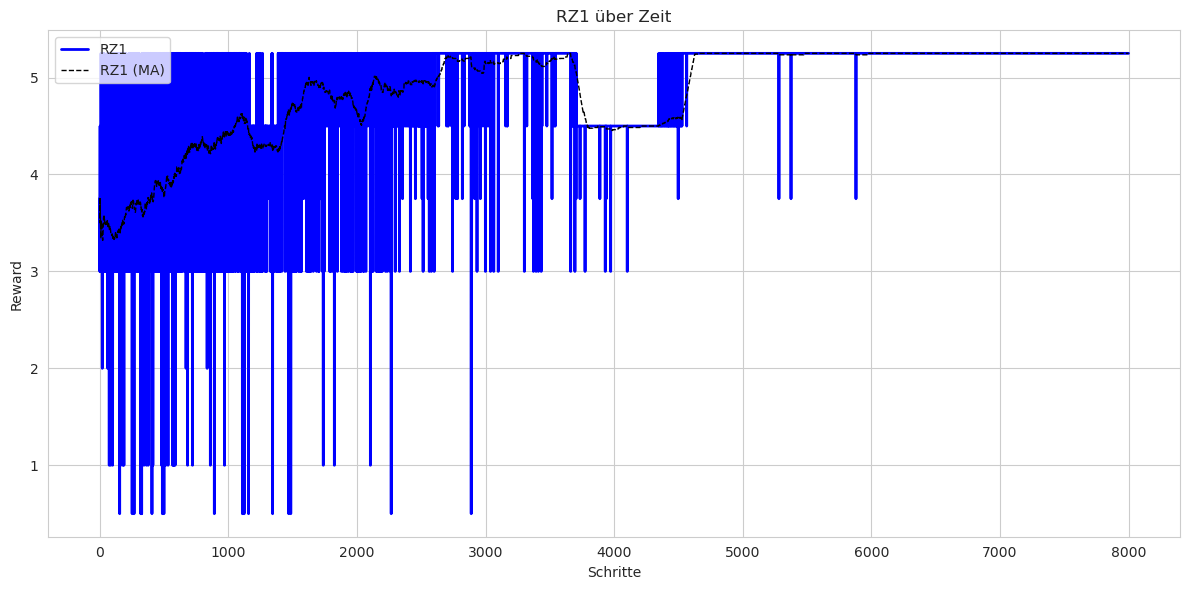

RZ2


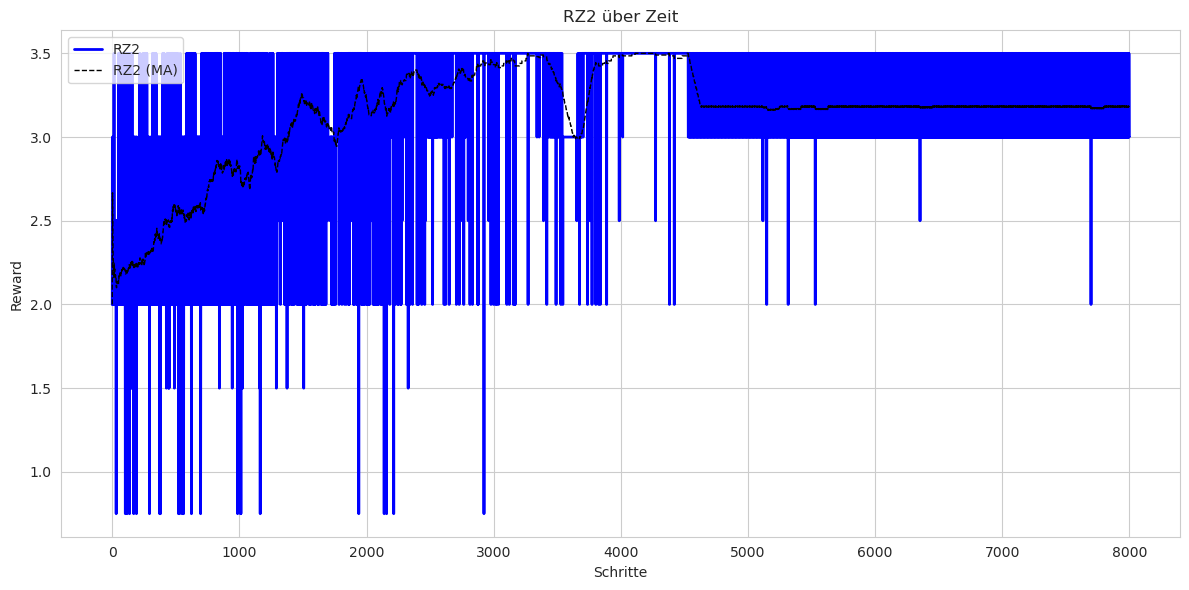

RZ3


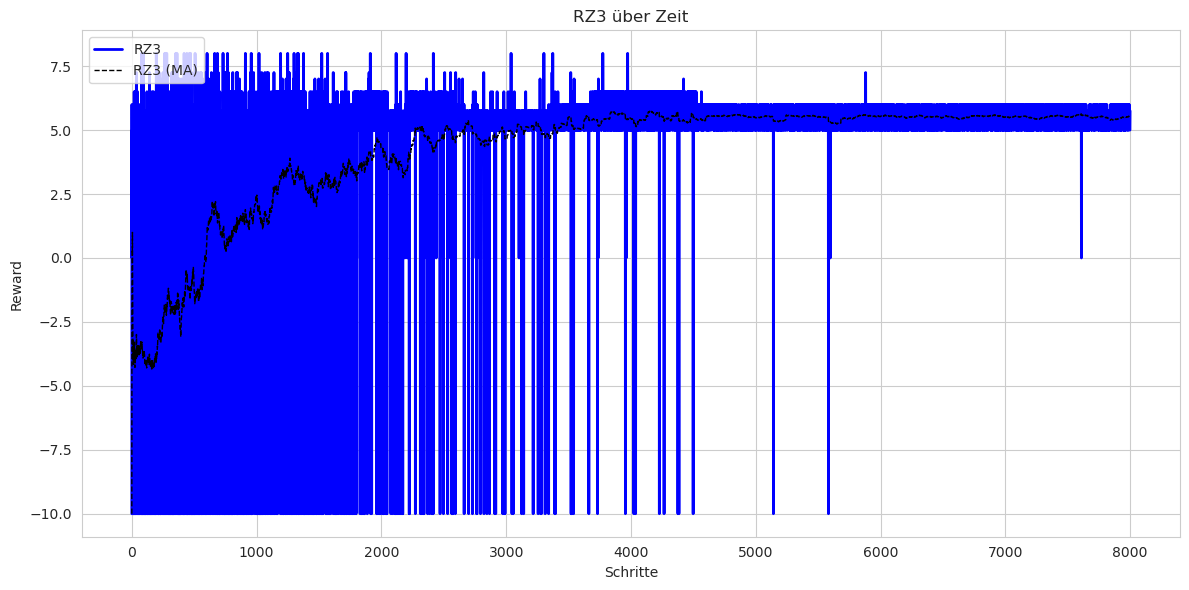

RZ4


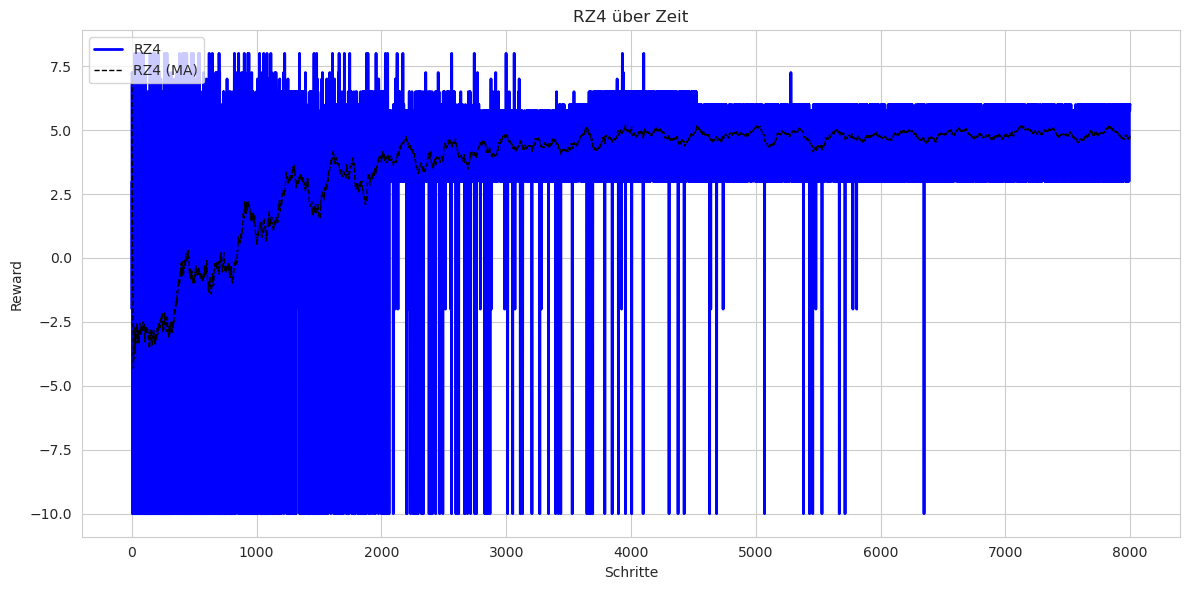

RZ5


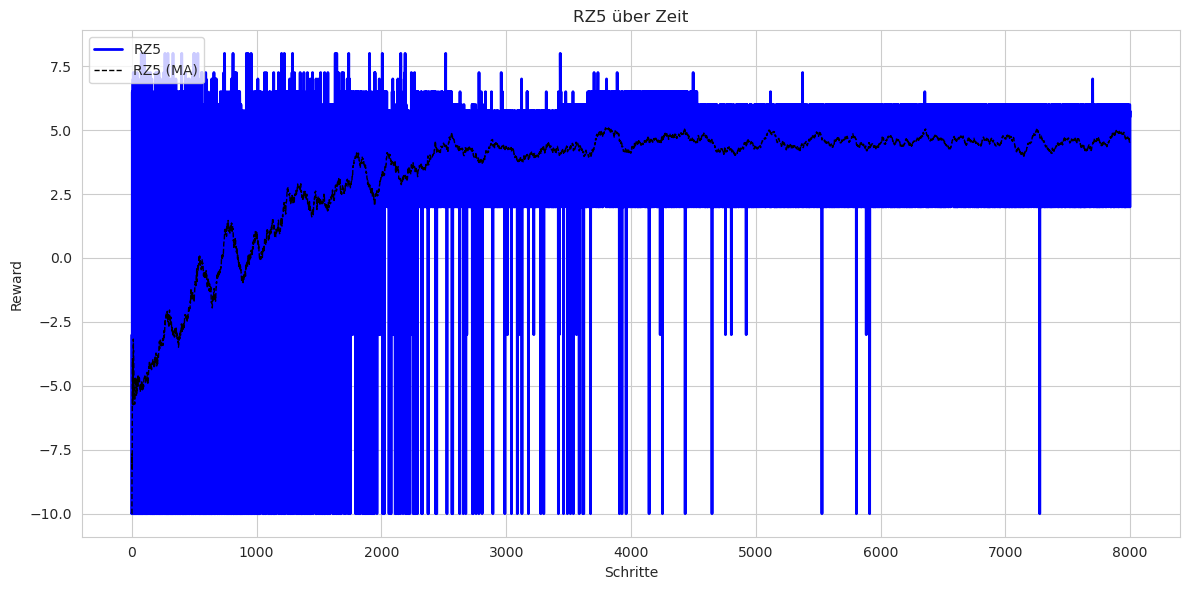

In [26]:
print("Plotting Rewards")
for agent in round_info[0].keys():
    if agent.startswith("RZ"):
        plots.plot_reward_for(agent, round_info)

Lineplot: Durchschnitts-Reward pro Agent über Zeit

Plotting Rewards


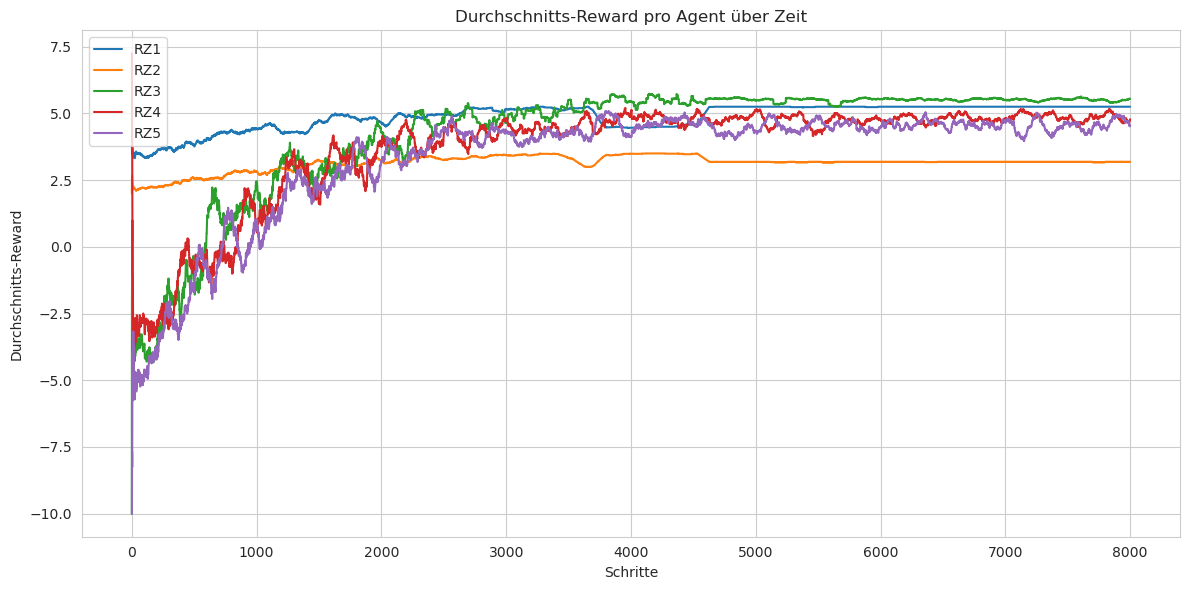

In [27]:
print("Plotting Rewards")
plots.plot_average_rewards(round_info)

Lineplot: Rewards und Social Welfare pro Runde

mean_reward


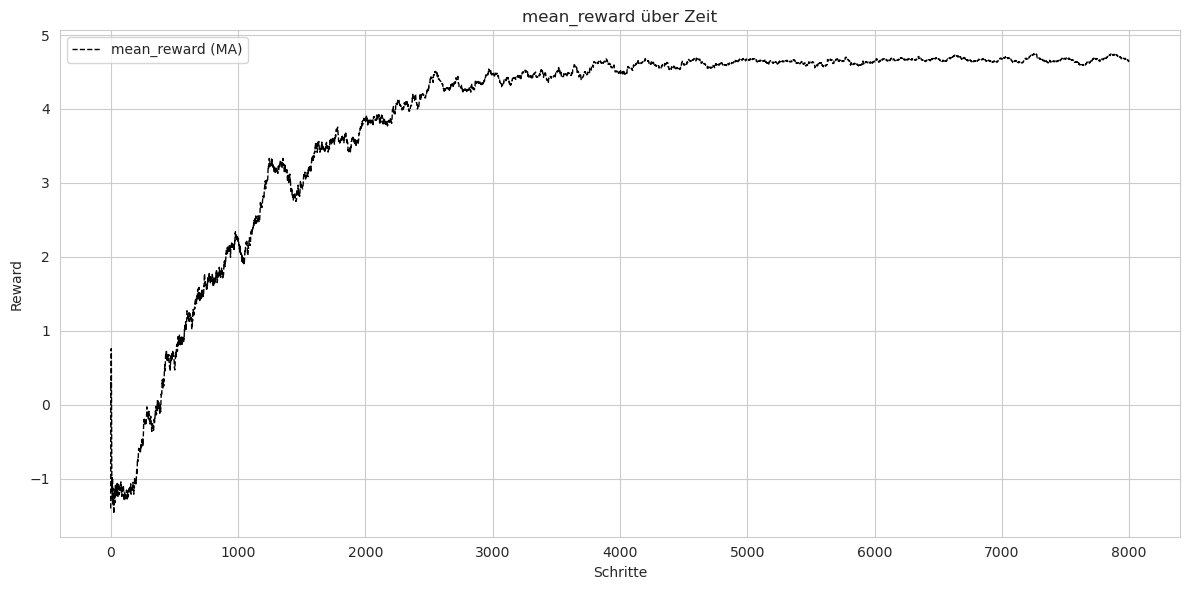

social_welfare


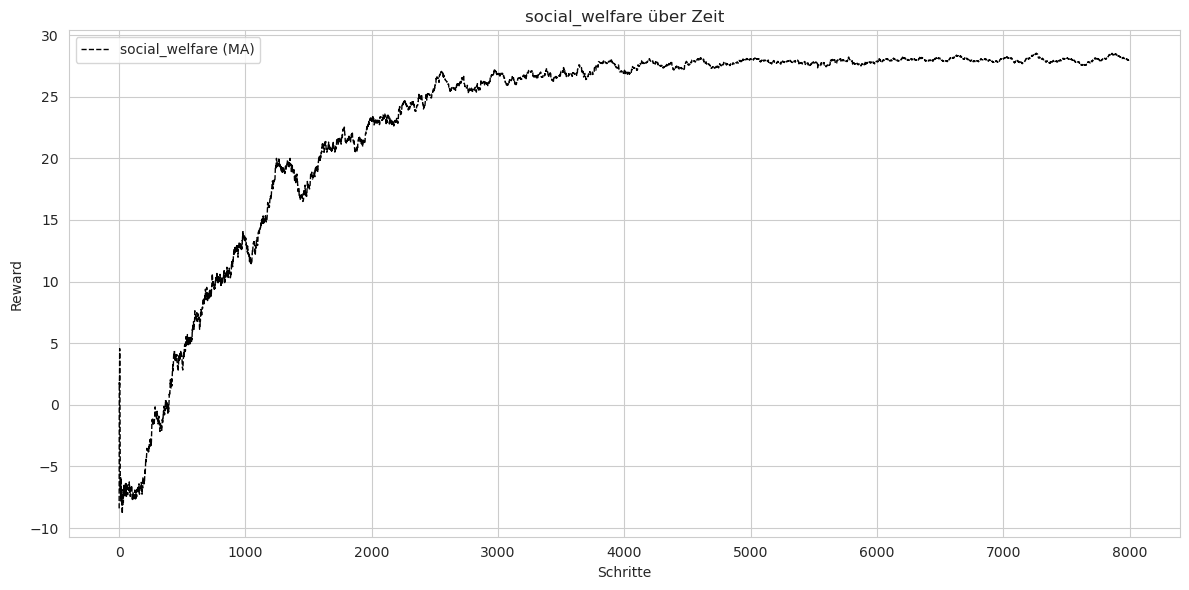

In [28]:
plots.plot_reward_for("mean_reward", round_info, only_ma=True)
plots.plot_reward_for("social_welfare", round_info, only_ma=True)

Lineplot: Q-Table Konvergenz pro Agent

Plotting Q-Table Convergance


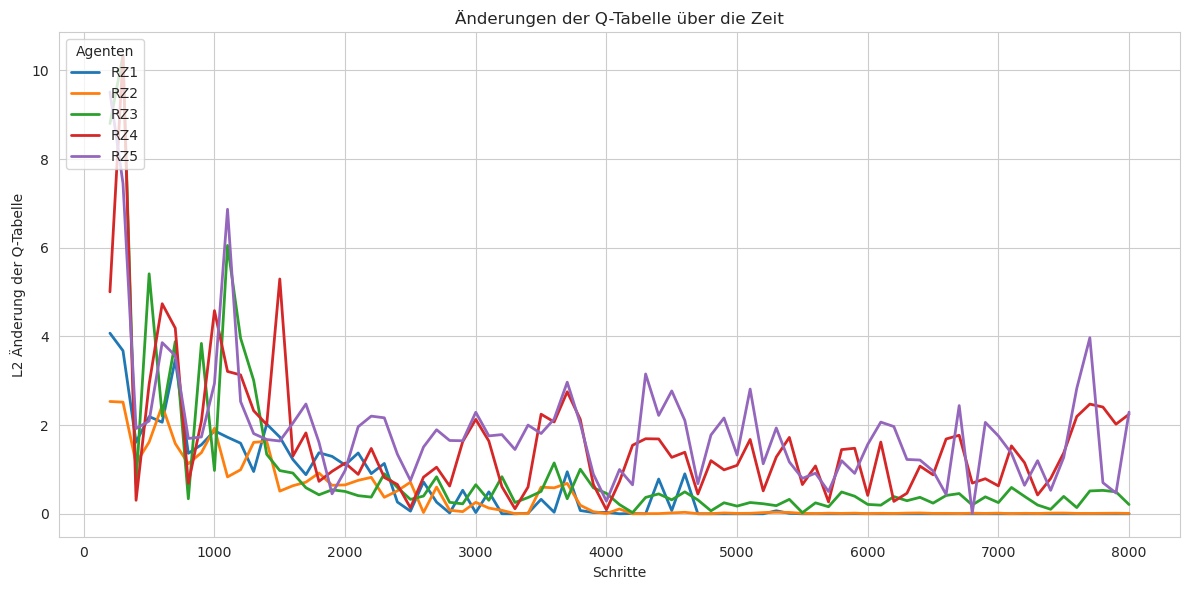

In [29]:
print("Plotting Q-Table Convergance")
plots.plot_q_convergance(q_snapshots, snap_steps)